<a href="https://colab.research.google.com/github/kumaramar5526/Task_6_DA/blob/main/Task_6_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a new SQLite database (or connect if it exists)

In [5]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create sales table

In [6]:
cursor.execute("DROP TABLE IF EXISTS sales")  # reset if rerun
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert some dummy sales data

In [7]:
sample_data = [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 52000),
    ("Mouse", 10, 500),
    ("Mouse", 5, 450),
    ("Keyboard", 4, 1500),
    ("Keyboard", 6, 1400),
    ("Monitor", 2, 12000),
    ("Monitor", 3, 11500),
    ("Headphones", 7, 2000),
    ("Headphones", 3, 2200),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Step 4: Commit

In [8]:
conn.commit()


print(" sales_data.db created with sample sales table and data.")


 sales_data.db created with sample sales table and data.


Run SQL Query

In [9]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

Print Results

In [10]:
print("📊 Basic Sales Summary")
print(df)

📊 Basic Sales Summary
      product  total_qty   revenue
0  Headphones         10   20600.0
1    Keyboard         10   14400.0
2      Laptop          5  254000.0
3     Monitor          5   58500.0
4       Mouse         15    7250.0


Plot Bar Chart

<Figure size 800x500 with 0 Axes>

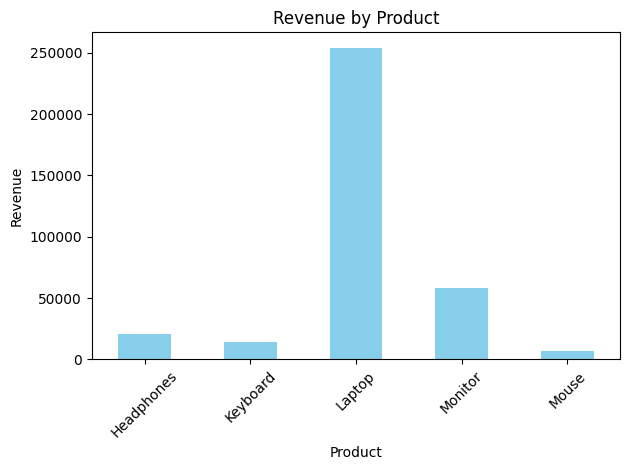

In [11]:
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color="skyblue")
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")   # Save the chart
plt.show()

 Close Connection

In [12]:
conn.close()